# Hypothesis Testing
> - Hypothesis testing and CIs allow us to only use sample data to draw conclusions about an entire **population.**
> - You are always performing hypothesis tests on **population parameters (denoted by Greek Symbols), never on statistics.** Statistics are values that you already have from the data, so it does not make sense to perform hypothesis tests on these values.
> - Common hypothesis tests include:
    - Testing a population mean (One sample t-test).
    - Testing the difference in means (Two sample t-test)
    - Testing the difference before and after some treatment on the same individual (Paired t-test)
    - Testing a population proportion (One sample z-test)
    - Testing the difference between population proportions (Two sample z-test)

#### We translate our question into hypothesis.

![](images/1.png)

## Errors

> - **Type I Error:** when the alternative is chosen, but the null is actually true. **(False Postive, alpha)**
    - Aka the **WORST ERROR POSSIBLE**
> - **Type II Error:** when the null is chosen, but the alternative is actually true. **(False Negative, beta)**

## Simulating from the Null
In the previous lesson on confidence intervals, we saw how we could simulate a sampling distribution for a statistic by bootstrapping our sample data. Alternatively, in hypothesis testing, we could simulate a sampling distribution from the null hypothesis using characteristics that would be true if our data were to have come from the null.

Here, you will walk through this process, and answer some quiz questions to solidify your understanding.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('data/coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  

In [10]:
nocoff_means, coff_means, diff = [], [], []
for _ in range(10000):
    bootsamples = sample_data.sample(200, replace=True)
    coff_mean = bootsamples[bootsamples['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamples[bootsamples['drinks_coffee'] == False]['height'].mean()
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diff.append(coff_mean - nocoff_mean)

In [11]:
np.std(coff_means)

0.2477385865762219

In [12]:
np.std(nocoff_means)

0.40573888609082925

In [13]:
np.std(diff)

0.4707615034665836

Text(0.5, 1.0, 'Sampling Distribution for Difference in Means')

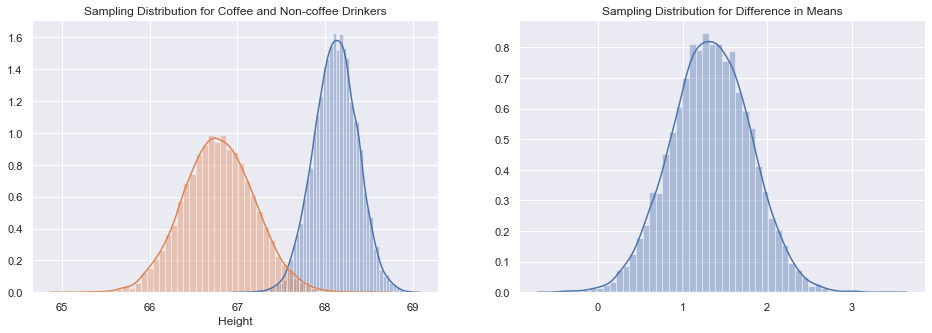

In [23]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sns.distplot(coff_means)
sns.distplot(nocoff_means)
plt.xlabel('Height')
plt.title('Sampling Distribution for Coffee and Non-coffee Drinkers')

#plt.subplot(1,2,2)
#sns.distplot(nocoff_means)
#plt.title('Sampling Distribution for Non-Coffee Drinkers')

plt.subplot(1,2,2)
sns.distplot(diff)
plt.title('Sampling Distribution for Difference in Means')

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

Text(0.5, 1.0, 'Sampling Distribution of Diff if it Comes From Null')

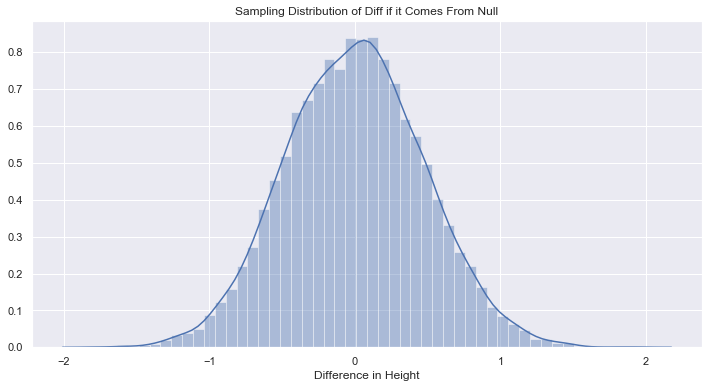

In [27]:
plt.figure(figsize=[12,6])

null_vals = np.random.normal(0, np.std(diff), 10000)
sns.distplot(null_vals)
plt.xlabel('Difference in Height')
plt.title('Sampling Distribution of Diff if it Comes From Null')

> We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis. If there is truly no difference, then the difference between the means should be zero.

## P-value
- If the null hypothesis is true, the probability of obtaining the observed statistic or one more extreme in favor of the alternative hypothesis.
- P-value is low, then null must go! The smaller the p-value is the more evidence we have that the null hypothesis is wrong.

![](images/2.png)

![](images/3.png)

**You don't say something like "I accept the null/alternative to be true based on our data.", because when we set up our hypothesis, we are already establishing that the null is true.**

## Drawing Conclusions
#### Calculating Errors¶
Here are two datasets that represent two of the examples you have seen in this lesson. One dataset is based on the parachute example, and the second is based on the judicial example. Neither of these datasets is based on real people.Use the exercises below to assist in answering the quiz questions at the bottom of this page.

In [30]:
jud = pd.read_csv('data/judicial_dataset_predictions.csv')
par = pd.read_csv('data/parachute_dataset.csv')

In [31]:
jud.head(3)

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent


In [49]:
par.head(3)

,parachute_id,actual,predicted
0,3956,opens,opens
1,2147,opens,opens
2,2024,opens,opens


`1.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **jud_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 1 below.  

In [40]:
# Type I: accepting alternative when null is true
jud_t1 = jud[(jud['actual'] == 'innocent') & (jud['predicted'] == 'guilty')]
print("The proportion of type I error:", jud_t1.shape[0]/jud.shape[0])

# Type II
jud_t2 = jud[(jud['actual'] == 'guilty') & (jud['predicted'] == 'innocent')]
print("The proportion of type II error:", jud_t2.shape[0]/jud.shape[0])

The proportion of type I error: 0.001510366607167376
The proportion of type II error: 0.04064259233832212


In [50]:
# Type I
par_t1 = par[(par['actual'] == 'fails') & (par['predicted'] == 'opens')]
print("The proportion of type I error:", par_t1.shape[0]/par.shape[0])

# Type II
par_t2 = par[(par['actual'] == 'opens') & (par['predicted'] == 'fails')]
print("The proportion of type II error:", par_t2.shape[0]/par.shape[0])

The proportion of type I error: 0.00017155601303825698
The proportion of type II error: 0.03980099502487562


## Other things to consider in hypothesis testing
- Make sure that the sample is representative of the population.
- Impact of sample size is huge. As sample size increases, small difference will become notable. (Hypothesis test may not be useful, actually)
- Bonferroni Correction: divide alpha by the number of trials.
- A two-sided hypothesis test (that is a test involving a \neq≠ in the alternative) is the same in terms of the conclusions made as a confidence interval as long as: **1 - CI = α**


### The Impact of Large Sample Sizes
When we increase our sample size, even the smallest of differences may seem significant. To illustrate this point, work through this notebook and the quiz questions that follow below.

`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60. Then, state the null and alternative hypothesis.

`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 

In [51]:
full_data['height'].mean()

67.59748697307934

In [52]:
np.std(full_data['height'])

3.118908711682146

In [53]:
sample1 = full_data.sample(5)
sample1['height'].mean()

66.66497172911902

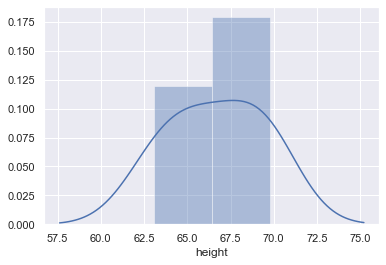

In [55]:
sns.distplot(sample1['height'])

In [56]:
np.std(sample1['height'])

2.5081385868552166

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

In [61]:
# sampling distribution using bootstrapping
samp_mean = []
for _ in range(10000):
    bootsamp = sample1.sample(5, replace=True)
    mean = bootsamp['height'].mean()
    samp_mean.append(mean)

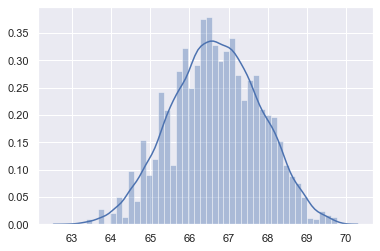

In [62]:
sns.distplot(samp_mean)

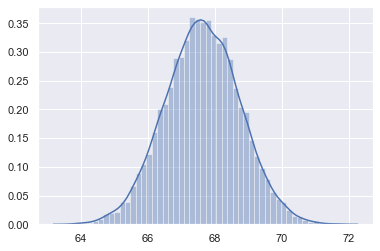

In [60]:
null_vals = np.random.normal(67.6, np.std(samp_mean), 10000)
sns.distplot(null_vals)

In [67]:
obs_mean = sample1['height'].mean()

# prob of getting more extreme higher
prob_extreme_high = (null_vals > obs_mean).mean()

# prob of getting more extreme lower
null_mean = 67.6
prob_extreme_low = (null_mean - (obs_mean - null_mean) < null_vals).mean()

pval = prob_extreme_high + prob_extreme_low
pval

1.007

`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.

In [75]:
sample2 = full_data.sample(300)
obs_mean = sample2['height'].mean()
print(obs_mean)

67.51184860747223


In [76]:
samp_mean_300 = []

for _ in range(10000):
    bootsamp_300 = sample2.sample(300, replace=True)
    mean = bootsamp_300['height'].mean()
    samp_mean_300.append(mean)
    
null_vals = np.random.normal(67.6, np.std(samp_mean_300), 10000)

In [81]:
obs_mean = sample2['height'].mean()

# prob of getting more extreme higher
prob_extreme_high = (null_vals > obs_mean).mean()

# prob of getting more extreme lower
null_mean = 67.6
prob_extreme_low = (null_mean - (obs_mean - null_mean) < null_vals).mean()

pval = prob_extreme_high + prob_extreme_low
pval

0.9991000000000001